In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('train.csv')
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [25]:
X = data.iloc[:,:20].values
y = data.iloc[:,20:].values

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. 

In [27]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [28]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
y = oh_encoder.fit_transform(y).toarray()

In [29]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

Building the Neural Network using Keras

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(16,input_dim=20,activation='relu'))
model.add(Dense(12,input_dim=16,activation='relu'))
model.add(Dense(4,input_dim=12,activation='softmax'))

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

Here loss is __"cross entropy loss"__. Categorical_crossentropy specifies that we have multiple classes. The Optimizer is __"Adam"__. Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.

In [34]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 13ms/step - loss: 1.4114 - accuracy: 0.2761 - val_loss: 1.3596 - val_accuracy: 0.3000
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3242 - accuracy: 0.3589 - val_loss: 1.2959 - val_accuracy: 0.3650
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2523 - accuracy: 0.4350 - val_loss: 1.2307 - val_accuracy: 0.4500
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 1.1803 - accuracy: 0.4867 - val_loss: 1.1605 - val_accuracy: 0.4900
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 1.1079 - accuracy: 0.5256 - val_loss: 1.0826 - val_accuracy: 0.5450
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 1.0362 - accuracy: 0.5711 - val_loss: 1.0116 - val_accuracy: 0.5900
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 0.9663 - accuracy: 0.6189 - val_loss: 0.9401 - val_accuracy: 0.6050
Epoch 8/100


Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.

In [35]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[9.9973327e-01, 2.6666874e-04, 1.9559292e-13, 1.5565477e-31],
       [1.2066255e-13, 3.0592774e-04, 9.9969351e-01, 5.9287345e-07],
       [2.5955040e-03, 9.9737906e-01, 2.5413243e-05, 3.5291630e-19],
       [1.1251944e-34, 1.3699350e-20, 2.3042170e-05, 9.9997699e-01],
       [3.8413836e-07, 5.3176928e-01, 4.6823013e-01, 2.0566189e-07]],
      dtype=float32)

In [36]:
y_test[:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [37]:
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [38]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print("The accuraacy is : ",a*100)

The accuraacy is :  95.5


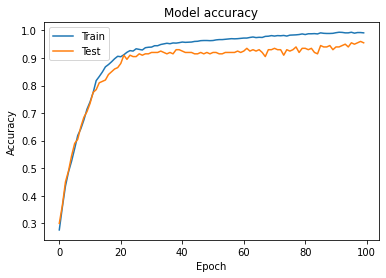

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

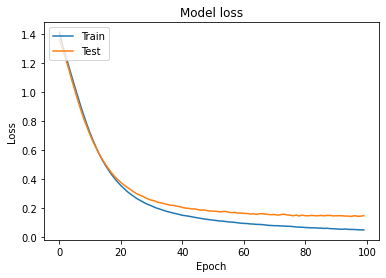

In [40]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()